Justin Stange-Heiduk, 8149363  
07.05.2024  
AKAD  
B.Sc Data Science  
Projekt Data Science

## Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
from itertools import product

# Setzen Sie die maximale Anzahl der angezeigten Zeilen auf 500
pd.set_option('display.max_rows', 500)

# Setzen Sie die maximale Anzahl der angezeigten Spalten auf 500
pd.set_option('display.max_columns', 500)

# Frage:  Laden Sie den Datensatz aus der Datei „nobel.csv“

In [4]:
# Setzen Sie die Breite der Spalten auf 1000
nobel = pd.read_csv('nobel.csv')

# Frage: Schauen Sie sich die Struktur der ersten Datenzeilen an

In [5]:
nobel.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


# Frage: Wie ist die Verteilung der Nobelpreisträger je Geschlecht?

In [6]:
# Wie viele Frauen und Männer haben den Nobelpreis gewonnen?
sex = nobel['sex'].value_counts()
print(sex)


Male      836
Female     49
Name: sex, dtype: int64


# Frage: Wie ist die Verteilung der Nobelpreisträger je Land? Sortieren Sie ihre Ergebnisse nach Anzahl der Nobelpreisträger

In [7]:
# Anzahl der Preisträger pro Geburtsland
feature_birth_country = nobel['birth_country'].value_counts()

# Anzeige der ersten 10 Zeilen sortiert nach Anzahl der Preisträger pro Geburtsland
print(feature_birth_country.head(10).sort_values(ascending=False))

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64


# Frage: Berechnen Sie den prozentualen Anteil der Nobelpreisträger, die aus den USA kommen, pro Dekade (also alle 10 Jahre)

In [20]:

def percentage_country_per_n_years(country: str, ) -> pd.DataFrame:
    """
    Kalkuliert den Prozentsatz der Nobelpreise, die von einem bestimmten Land gewonnen wurden, für jedes Dekade. 

    Parameters:
    -----------
    country: str
        Das Land, für das der Prozentsatz der Nobelpreise berechnet werden soll.    

    Returns:    
    -----------
    DataFrame
        Ein DataFrame mit den Spalten "decade" und "country_decade_percentage". 
        Die Spalte "decade" enthält das Jahrzehnt, und die Spalte "country_decade_percentage" enthält den Prozentsatz der Nobelpreise, die von dem Land in diesem Jahrzehnt gewonnen wurden.
    """
    
    if country not in nobel['birth_country'].unique():
        raise ValueError(f"{country} is not in the 'birth_country' column of the 'nobel' DataFrame")

    # Copy the DataFrame
    data_copy = nobel.copy()
    # Filter die Daten nach dem Land
    new_data = data_copy[data_copy['birth_country'] == country]

    # Füge eine Spalte "decade" hinzu, die das Jahrzehnt enthält
    new_data['decade'] = new_data['year'] // 10 * 10
    data_copy['decade'] = data_copy['year'] // 10 * 10


    # Berechne die Anzahl der Nobelpreise, die von dem Land in jedem Jahrzehnt gewonnen wurden
    new_data = new_data['decade'].value_counts()
    data_copy = data_copy['decade'].value_counts()

    country_decade_percentage = new_data / data_copy

    # Erstellen Sie ein DataFrame mit den Ergebnissen
    result_df = pd.DataFrame({'decade': country_decade_percentage.index, 'country_decade_percentage': country_decade_percentage.values})

    return result_df




In [22]:
percentage_country_per_n_years_df = percentage_country_per_n_years('United States of America')
print(percentage_country_per_n_years_df)

    decade  country_decade_percentage
0     1900                   0.017857
1     1910                   0.078947
2     1920                   0.074074
3     1930                   0.254545
4     1940                   0.325000
5     1950                   0.295775
6     1960                   0.280000
7     1970                   0.320388
8     1980                   0.329787
9     1990                   0.415842
10    2000                   0.440678
11    2010                   0.294872


d:\Anaconda\envs\nobel\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Visualisieren Sie den prozentualen Anteil der Nobelpreisträger, die aus den USA kommen, pro Dekade für den gesamten Datensatz. In welcher Dekade wurden die USA zu einer dominanten Größe? 

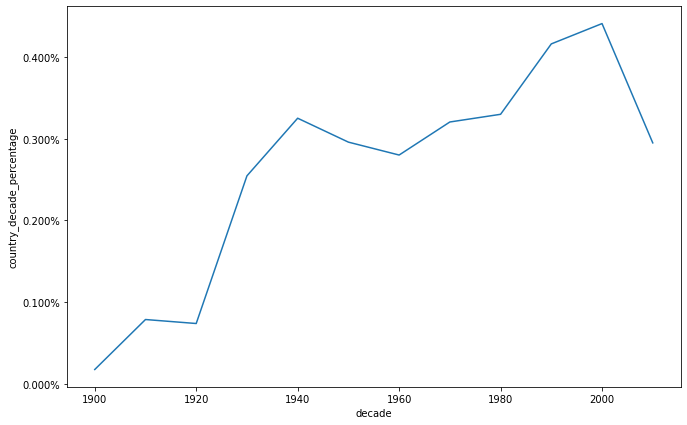

In [23]:

#sns.set_theme()
plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(x=percentage_country_per_n_years_df['decade'], y= percentage_country_per_n_years_df['country_decade_percentage'], data= nobel)
ax.yaxis.set_major_formatter(PercentFormatter())


# Frage: In welcher Dekade wurden die USA zu einer dominaten Größe?

# Antwort: Ab den Dekade 1930 wurde USA eine dominate Größe. Vor den Dekade 1930 war der höchste prozentualle Anteil nur 7,5% und ab 1930 immer höher als 25%.

# Frage: Visualisieren Sie den prozentualen Anteil an Frauen über die einzelnen Dekaden pro Preiskategorie

In [24]:
def df_winner_per_category_per_decade(data: pd.DataFrame) -> pd.DataFrame:
    """
    Berechnet die Anzahl der Nobelpreisträger pro Kategorie für ein bestimmtes Jahrzehnt.

    Parameters:
    -----------
    data: DataFrame
        Das DataFrame, das die Daten enthält, aus denen die Anzahl der Nobelpreisträger pro Kategorie für ein bestimmtes Jahrzehnt berechnet werden soll.

    Returns:    
    -----------
    DataFrame
        Ein DataFrame mit den Spalten "decade" und den Kategorien als Spaltennamen.
    """
    
    # Speichern aller Kategorien
    categories = nobel['category'].unique()

    # Erstellen Sie ein DataFrame mit den Spalten "decade" und den Kategorien als Spaltennamen
    data_winner_per_category = data.groupby(['decade', 'category']).size().reset_index(name='count')
    
    # Erstellen Sie ein DataFrame, das die Anzahl der Nobelpreisträger pro Kategorie für ein bestimmtes Jahrzehnt enthält
    count_data_winner_per_category = pd.DataFrame()
    count_data_winner_per_category['decade'] = nobel['decade'].unique()

    # Fügen Sie die Kategorien als Spaltennamen hinzu
    for category in categories:
        exec(f"count_data_winner_per_category[{'category'}] = 0")
        

    # Füllen Sie das DataFrame mit den Daten
    for i in range(len(data_winner_per_category)):
        decade_, category_, count = data_winner_per_category.loc[i]
        count_data_winner_per_category.loc[(count_data_winner_per_category['decade'] == decade_) & (count_data_winner_per_category[category_] == 0), category_] = count


    return count_data_winner_per_category

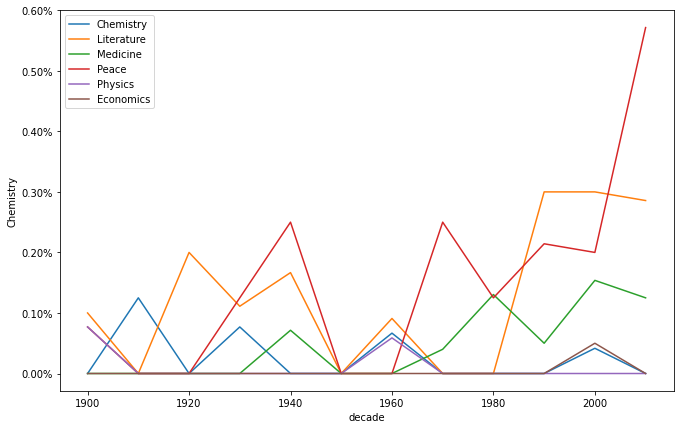

In [25]:
# Nobel Daten die Dekade hinzufügen
nobel['decade'] = nobel['year'] // 10 * 10

# Filtern Sie die Daten nach Frauen
women_winner = nobel[nobel['sex'] == 'Female']

# Berechnen Sie die Anzahl der Nobelpreisträger pro Kategorie für Frauen
count_women_winner_per_category = df_winner_per_category_per_decade(women_winner)

# Berechnen Sie die Anzahl der Nobelpreisträger pro Kategorie für alle Preisträger
count_all_winner_per_category = df_winner_per_category_per_decade(nobel)

# Berechnen Sie den Prozentsatz der Frauen, die den Nobelpreis pro Kategorie gewonnen haben
percentage_women_winner = count_women_winner_per_category.div(count_all_winner_per_category)
percentage_women_winner['decade'] = nobel['decade'].unique()
percentage_women_winner.fillna(0, inplace=True)

# Erstellen Sie ein Liniendiagramm, das den Prozentsatz der Frauen zeigt, die den Nobelpreis pro Kategorie gewonnen haben
features = percentage_women_winner.columns[1:]
plt.rcParams['figure.figsize'] = [11, 7]
for feature in features:
    ax = sns.lineplot(x='decade', y=feature, data=percentage_women_winner)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.legend(features)
plt.show()

                  


## Frage: Was bedeutet ein Ungleichgewicht und ist es innerhalb bestimmter Preiskategorien wie Physik, Medizin, Literatur usw. besser oder schlechter?

## Antwort: Ein Ungleichgewicht herrscht, wenn in einer bestimmten Kategorien Frauen haüfiger gewinnen als in anderen Kategorien. Im folgenden Beispiel ist es gut erkennbar: In der Kategorie Peace haben Frauen insgeamt 16 mal gewonnen und in Physik nur 2.


# Frage: Zeichnen Sie Graphen, die je Preiskategorie das Alter der Nobelpreisträger über die verschiedenen Jahre als Streudiagramm (Scatterplot) wiedergeben

In [13]:
def calculate_age(data:pd.DataFrame)-> pd.DataFrame:
    """
    Paramters:
    -----------
    data: DataFrame
        Ein DataFrame, das die Daten enthält, aus denen das Alter der Nobelpreisträger berechnet werden soll.
    
    Returns:
    -----------
    data: DataFrame
        Ein DataFrame, das die Daten enthält, aus denen das Alter der Nobelpreisträger berechnet wurde.
    """

    # Erstellen Sie eine leere Liste, um die Ergebnisse zu speichern
    older_list = []

    # Iterieren Sie über die Zeilen des DataFrames
    for i in range(len(data)):
        # Extrahieren Sie das Geburtsdatum aus der Zeile
        datum = data['birth_date'].iloc[i]
        # Extrahieren Sie das Jahr aus dem Datum
        datum_jahr = datum[0:4]
        datum_jahr = int(datum_jahr)
        # Extrahieren Sie das Jahr aus der Zeile
        jahr = data['year'].iloc[i]
        # Berechnen Sie das Alter des Preisträgers
        ergebnis = jahr - datum_jahr
        # Fügen Sie das Ergebnis zur Liste hinzu
        older_list.append(ergebnis)
    # Fügen Sie die Liste als neue Spalte zum DataFrame hinzu    
    data['older'] = older_list

    return data 

d:\Anaconda\envs\nobel\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\Anaconda\envs\nobel\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


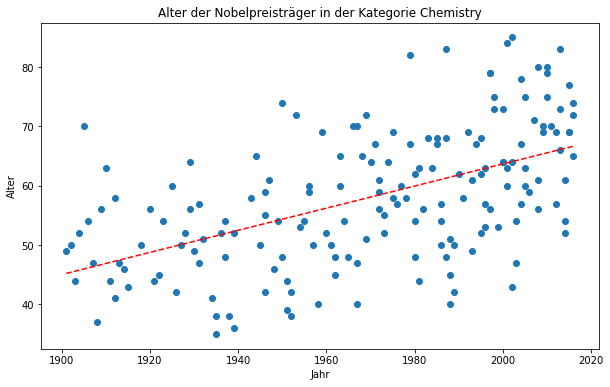

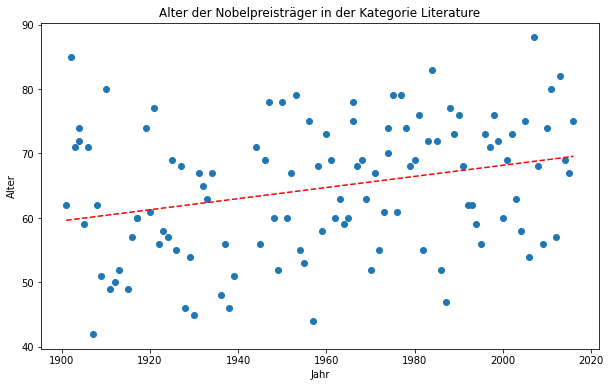

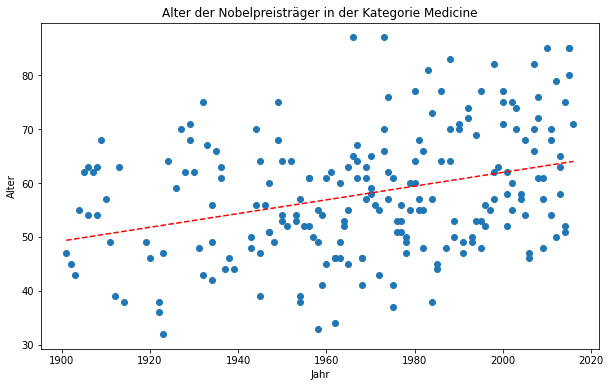

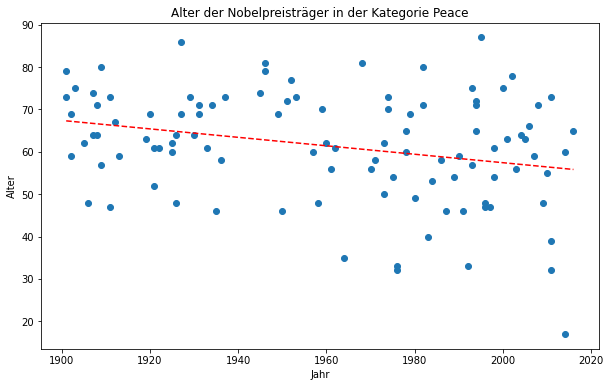

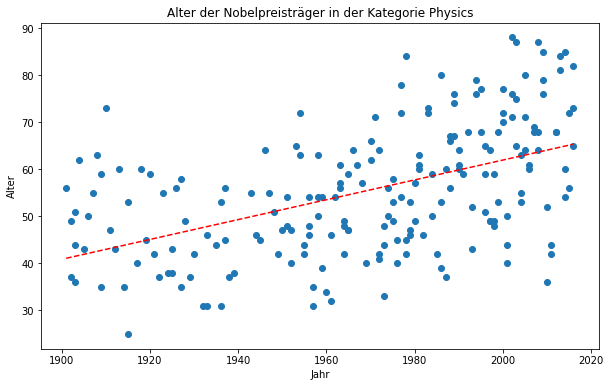

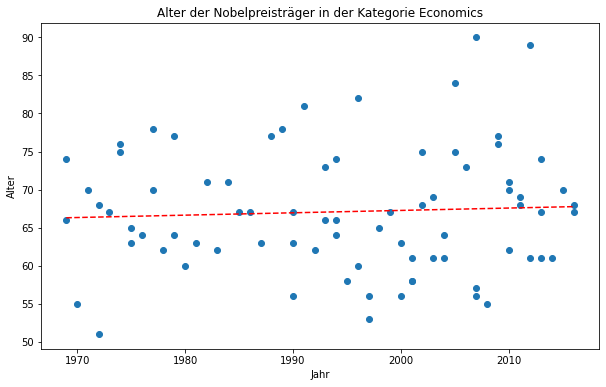

In [14]:
# Filtern Sie die Daten nach den Zeilen, die keine fehlenden Werte in der Spalte "birth_date" enthalten
nobel = nobel.dropna(subset=['birth_date'])

# Berechnen Sie das Alter der Nobelpreisträger
df = pd.DataFrame()
df = nobel[['year', 'category', 'birth_date']]
# Drop the rows with missing values in the "birth_date" column
#df = df.dropna(subset=['birth_date'])
# Calculate the age of the Nobel Prize winners
df_alter = calculate_age(df)
df_alter.drop(['birth_date'], axis=1, inplace=True)

# Kategorien speichern
categories = df_alter['category'].unique()

for category in categories:
    # Filtern Sie den DataFrame nach der aktuellen Kategorie
    df_category = df_alter[df_alter['category'] == category]
    
    # Erstellen Sie den Scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(df_category['year'], df_category['older'])
    
    # Berechnen Sie die Trendlinie
    z = np.polyfit(df_category['year'], df_category['older'], 1)
    p = np.poly1d(z)
    plt.plot(df_category['year'], p(df_category['year']), "r--")
    
    # Setzen Sie den Titel und die Achsenbeschriftungen
    plt.title('Alter der Nobelpreisträger in der Kategorie ' + category)
    plt.xlabel('Jahr')
    plt.ylabel('Alter')
    
    # Zeigen Sie den Plot an
    plt.show()

## Frage: Gibt es da Unterschiede und wie können Sie diese Unterschiede erklären?

## Antwort: Es sind Unterschiede zu erkennen. Zum Beispiel im Alter der Gewinner der Kategorie Phsyics und Econimics. In Phsyics gewinnen Menschen die auch unter 50 sind und der Trend ist aber in den letzten Dekaden steigend und in der Kategorie Econimics ist keiner unter 50 und der Trend ist sehr stabil mit kaum einer Steigung. Tendenziell ist ein Trend bei allen außer Peace zu erkennen, dass das Alter in den letzten Dekaden steigt. Die Unterschiede zu erklären wäre eine Aufgabe von Recherche. Eine Möglichkeit wäre warum bei der Kategorie Peace vermehrt jügere Menschen gewinnen, dass die neue Generation ein besonders Pflichtgefühl für Umweltschutz und Frieden besitzen.   

# Frage: Exportieren Sie ein Pandas-Dataframe in eine CSV-Datei, der pro Dekade und Preiskategorie den prozentualen Anteil an männlichen und weiblichen Preisträgern aufweist sowie deren Durchschnittsalter aufweist. Die Spalten sollten also wie folgt sein: decade, category, percentage_female, percentage_male, average_age

In [15]:
nobel_all = nobel.copy()


decades = nobel_all['decade'].unique()
categories = nobel_all['category'].unique()

men_winner = nobel[nobel['sex'] == 'Male']
count_men_winner_per_category = df_winner_per_category_per_decade(men_winner)



# Berechnen Sie den Prozentsatz der Männer, die den Nobelpreis pro Kategorie gewonnen haben
percentage_men_winner = count_men_winner_per_category.div(count_all_winner_per_category)
percentage_men_winner['decade'] = nobel['decade'].unique()
percentage_men_winner.fillna(0, inplace=True)
percentage_men_winner['decade'] = nobel_all['decade'].unique()



df_all = pd.DataFrame()


# Erstellen Sie eine Liste aller Kombinationen aus 'decade' und 'category'
combinations = list(product(nobel_all['decade'].unique(), nobel_all['category'].unique()))

# Erstellen Sie ein DataFrame aus der Liste der Kombinationen
df_all = pd.DataFrame(combinations, columns=['decade', 'category'])




df_all['percentage_female'] = np.zeros(len(df_all))
df_all['percentage_male'] = np.zeros(len(df_all))


percentage_list_women, percentage_list_men = [] , []
for i, decade in enumerate(decades):
    # Index zeile percentage_women_winner
    x = percentage_women_winner.loc[(percentage_women_winner['decade'] == decade)].index[0]
    
    for j, category in enumerate(categories):
       # Index spalte
       y = percentage_women_winner.columns.get_loc(category)
    
       # Wert in der Zelle
       value_women = percentage_women_winner.iloc[x,y]
       percentage_list_women.append(value_women)
       value_men = percentage_men_winner.iloc[x,y]
       percentage_list_men.append(value_men)

df_all['percentage_female'] = percentage_list_women
df_all['percentage_male'] = percentage_list_men

# Der Nobel Preis in der Kategorie 'Economics' vor 1960 wird entfernt weil es ih nicht gab
mask = (df_all['category'] == 'Economics') & (df_all['decade'] < 1960)
df_all = df_all.drop(df_all[mask].index)
df_all = df_all.reset_index(drop=True)

# Hinzufüger der Spalte 'older' zu df_all
nobel_all['older'] = df_alter['older']

# Berechnen Sie das durchschnittliche Alter der Nobelpreisträger für jede Dekade und Kategorie
df_sorted = nobel_all.sort_values(['decade', 'category'])
df_average_age = df_sorted.groupby(['decade', 'category'])['older'].mean().reset_index()

# Fügen Sie die Spalte 'average_age' zu df_all hinzu
df_all['average_age'] = df_average_age['older']

# Runden Sie die Werte auf zwei Dezimalstellen
df_all['percentage_female'] = df_all['percentage_female'].round(2)
df_all['percentage_male'] = df_all['percentage_male'].round(2)
df_all['average_age'] = df_all['average_age'].round(2)

# Speichern Sie das DataFrame in einer CSV-Datei
df_all.to_csv('nobel-analyse.csv', index=False)
